# Prototype Curves – Week 1

**Goals**
1. Load `docs/literature_matrix.csv`.
2. Plot F1 vs. annotator minutes for *Dragut et al., 2019*.
3. Plot accuracy vs. dollars for *Kang et al., 2023*.
4. Illustrate diminishing returns & marginal-gain stop point.

_Code cells will be added once I’m on a machine with Jupyter._


In [18]:
import sys, os
sys.path.append(os.path.abspath('..'))

In [19]:
# Load literature matrix and make src importable
import pandas as pd, pathlib, os, sys
ROOT = pathlib.Path(os.getcwd()).parent
if str(ROOT) not in sys.path:
    sys.path.insert(0, str(ROOT))

df = pd.read_csv(ROOT / "docs" / "literature_matrix.csv")
print("Loaded", len(df), "rows")
df.head()


Loaded 4 rows


,Paper,Year,Task,Dataset / Domain,Cost Metric,Performance Metric,Key Curve Data,Compute Cost,Annotation Cost ($),Energy / CO₂,Notes / Caveats
0,Dragut et al. 2019,2019,Entity extraction (regex vs. labels),Retail product descriptions,Annotator minutes,F1,0:0.58;30:0.72;60:0.78;120:0.80,NaN,0.10/span,NaN,F1 plateaus after 120 min
1,Kang et al. 2023,2023,Distill vs. Annotate (6 NLP tasks),"MNLI, SST-2, etc.",Dollars spent (GPU vs. labels),Accuracy,0:0.65;100:0.76;300:0.81;600:0.83,Teacher: 8 GPUh per run,0.06/label,Approx. 15 kg CO₂ / 8 GPUh,Mixed strategy best around 40% compute spend
2,Stiennon et al. 2021,2021,Summarization with human feedback,CNN/DailyMail summaries,Number of human preference labels,Reward score,0:0.0;5000:0.15;20000:0.24;40000:0.28,Student fine-tune: 4 GPUh,0.05/preference,Approx. 8 kg CO₂ / 4 GPUh,RL steadily improves with more feedback
3,Strubell et al. 2019,2019,Energy/CO₂ cost of DL training,BERT pretraining,GPU hours → kWh → kg CO₂,–,GPUh:626 kWh ≈ 280 kg CO₂,Varies,NaN,280 kg CO₂ for BERT pre-train,Older hardware; modern TPUs more efficient


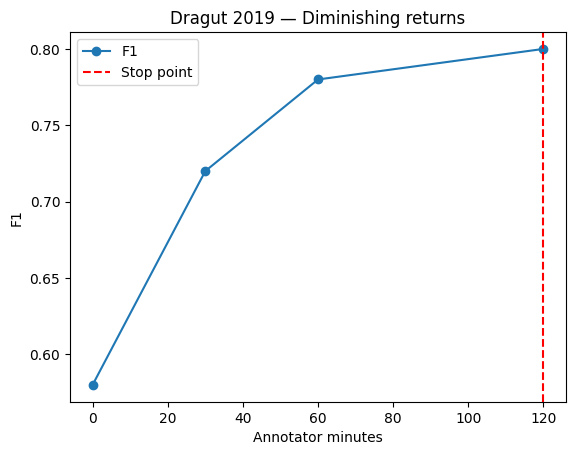

In [23]:
from src.utils import parse_curve, marginal_gain
import matplotlib.pyplot as plt
import numpy as np

# --- Dragut ---
row_d = df[df['Paper'].str.contains('Dragut')].iloc[0]
x_d, y_d = zip(*parse_curve(row_d['Key Curve Data']))

plt.figure()
plt.plot(x_d, y_d, marker='o', label='F1')
plt.xlabel('Annotator minutes')
plt.ylabel('F1')
plt.title('Dragut 2019 — Diminishing returns')

# marginal gain & stop point
mg_x, mg = zip(*marginal_gain(list(x_d), list(y_d)))
cost_per_min = 0.001  # adjust later
stop_idx = next(i for i, g in enumerate(mg) if g < cost_per_min)
plt.axvline(mg_x[stop_idx], linestyle='--', color='red', label='Stop point')
plt.legend()
plt.savefig('../docs/figures/dragut_curve.png', dpi=150)
plt.show()

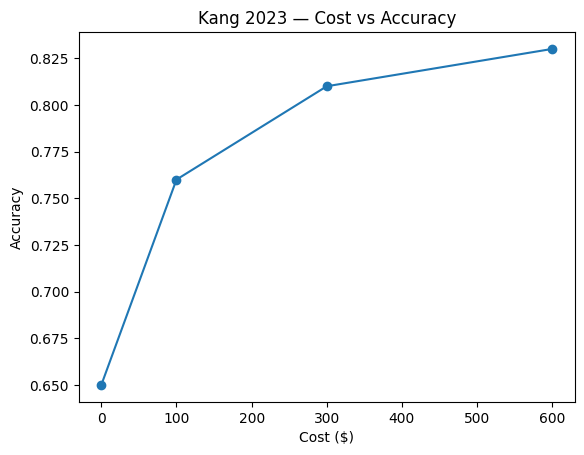

In [22]:
row_k = df[df['Paper'].str.contains('Kang')].iloc[0]
x_k, y_k = zip(*parse_curve(row_k['Key Curve Data']))  # dollars vs accuracy

plt.figure()
plt.plot(x_k, y_k, marker='o')
plt.xlabel('Cost ($)')
plt.ylabel('Accuracy')
plt.title('Kang 2023 — Cost vs Accuracy')
plt.savefig('../docs/figures/kang_curve.png', dpi=150)
plt.show()